# 00_titanic_EDA1
Autor: Carlos Wong <br/>
Fecha: 2022_01_11 <br/>
Tipo de problema: CLASIFICACIÓN <br/>
Entradas: 'train', 'test', 'gender_submission' kaggle competition (titanic) <br/>
Salidas: Submission ('PassengerId','Survived')  <br/>
Propósito: Práctica de análisis, visualización, entrenamiento, predicción y documentación

## 1. LIBRERÍAS Y EXTRACCIÓN DE DATOS 

In [1]:
# librerías estándar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# extracción de datasets
train = pd.read_excel(r'.\train.xlsx')
test = pd.read_csv(r'.\test.csv')
gender_submission = pd.read_csv(r'.\gender_submission.csv')

In [3]:
# se muestra el tipo de submission: 'PassengerId' -> Id del pasajero / 'Survived' -> predicción (int) 
gender_submission.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [4]:
# Se extraen los PassengerId del dataset 'test' para completar fichero submission
PassengerId = test['PassengerId']

In [5]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


## 2. Exploración de la variable objetivo

In [7]:
# La variable objetivo 'Survived' en el dataset 'test' no existe, el resto es igual
traincolumns = train.columns.tolist()
testcolumns = test.columns.tolist()
print(traincolumns)
print(testcolumns)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [8]:
# Se divide el dataset 'train' en 'survived' y 'not_survived'
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

In [9]:
# Aproximadamente el 68% de los supervivientes son mujeres
survived['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [10]:
# aproximadamente el 85% de los fallecidos son hombres
not_survived['Sex'].value_counts()

male      468
female     81
Name: Sex, dtype: int64

In [11]:
# las mujeres tienen muchas más probabilidades de sobrevivir que los hombres
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of women who survived:", rate_women*100)
print("% of men who survived:", rate_men*100)

% of women who survived: 74.20382165605095
% of men who survived: 18.890814558058924


### Feature: Pclass

In [12]:
survived['Pclass'].value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [13]:
# a medida que la clase de pasajero es peor disminuyen sus probabilidades de sobrevivir
class1 = train.loc[train.Pclass == 1]["Survived"]
rate_class1 = sum(class1)/len(class1)

class2 = train.loc[train.Pclass == 2]["Survived"]
rate_class2 = sum(class2)/len(class2)

class3 = train.loc[train.Pclass == 3]["Survived"]
rate_class3 = sum(class3)/len(class3)

print("% of people of class 1 who survive:", rate_class1*100)
print("% of people of class 2 who survive:", rate_class2*100)
print("% of people of class 3 who survive:", rate_class3*100)

% of people of class 1 who survive: 62.96296296296296
% of people of class 2 who survive: 47.28260869565217
% of people of class 3 who survive: 24.236252545824847


In [14]:
# entre las mujeres, las de 1ra. clase tienen casi un 100% de probabilidades de supervivencia
# si eres mujer con un billete de 3ra clase tu probabilidad de sobrevivir baja al 50%
womenClass1 = train.loc[(train.Sex == 'female') & (train.Pclass == 1)]["Survived"]
womenClass2 = train.loc[(train.Sex == 'female') & (train.Pclass == 2)]["Survived"]
womenClass3 = train.loc[(train.Sex == 'female') & (train.Pclass == 3)]["Survived"]
rate_womenClass1 = sum(womenClass1)/len(womenClass1)
rate_womenClass2 = sum(womenClass2)/len(womenClass2)
rate_womenClass3 = sum(womenClass3)/len(womenClass3)

print("% of women from Class1 who survived:", rate_womenClass1*100)
print("% of women from Class2 who survived:", rate_womenClass2*100)
print("% of women from Class3 who survived:", rate_womenClass3*100)

% of women from Class1 who survived: 96.80851063829788
% of women from Class2 who survived: 92.10526315789474
% of women from Class3 who survived: 50.0


In [15]:
# aunque la probabilidad de sobrevivir de los hombres es baja, si tienes un billete de 1ra clase, la probabilidad es mayor
menClass1 = train.loc[(train.Sex == 'male') & (train.Pclass == 1)]["Survived"]
menClass2 = train.loc[(train.Sex == 'male') & (train.Pclass == 2)]["Survived"]
menClass3 = train.loc[(train.Sex == 'male') & (train.Pclass == 3)]["Survived"]
rate_menClass1 = sum(menClass1)/len(menClass1)
rate_menClass2 = sum(menClass2)/len(menClass2)
rate_menClass3 = sum(menClass3)/len(menClass3)

print("% of men from Class1 who survived:", rate_menClass1*100)
print("% of men from Class2 who survived:", rate_menClass2*100)
print("% of men from Class3 who survived:", rate_menClass3*100)

% of men from Class1 who survived: 36.885245901639344
% of men from Class2 who survived: 15.74074074074074
% of men from Class3 who survived: 13.544668587896252


In [16]:
not_survived['Pclass'].value_counts()

3    372
2     97
1     80
Name: Pclass, dtype: int64

In [17]:
# el mayor grupo que sobrevive se encuentra en la banda de 23 a 34 años
survived['AgeBand'] = pd.cut(survived['Age'], 7)
survived['AgeBand'].value_counts()

<ipython-input-17-9cfea58ab080>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survived['AgeBand'] = pd.cut(survived['Age'], 7)


(23.157, 34.526]    93
(11.789, 23.157]    64
(34.526, 45.894]    56
(0.34, 11.789]      39
(45.894, 57.263]    28
(57.263, 68.631]     9
(68.631, 80.0]       1
Name: AgeBand, dtype: int64

In [55]:
train['AgeBand'] = pd.cut(train['Age'], 7, labels=['0-11', '12-23', '24-34', '35-46', '47-57','58-68','69-80'])
train['AgeBand'].value_counts()

24-34    233
12-23    178
35-46    134
47-57     68
0-11      68
58-68     26
69-80      7
Name: AgeBand, dtype: int64

# RESPUESTA 1: 
### `Mis probabilidades de supervivencia` dadas mis condiciones (de edad, sexo, clase social), con los datos sin haber sido tratados  `son de un 0%` 

In [71]:
menClass2age47_57 = train.loc[(train.Sex == 'male') & (train.Pclass == 2) & (train.AgeBand == '47-57')]["Survived"]
rate_menClass2age47_57 = sum(menClass2age47_57)/len(menClass2age47_57)
print("% of men from Class2 of 48 years old who survived:", rate_menClass2age47_57*100)

% of men from Class2 of 48 years old who survived: 0.0


In [19]:
# el mayor grupo que NO sobrevive se encuentra en la banda de 21 a 32 años (similar edad que el grupo que sí sobrevive)
not_survived['AgeBand'] = pd.cut(not_survived['Age'], 7)
not_survived['AgeBand'].value_counts()

<ipython-input-19-b05fcc1aaf6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_survived['AgeBand'] = pd.cut(not_survived['Age'], 7)


(21.857, 32.286]    146
(11.429, 21.857]     88
(32.286, 42.714]     79
(42.714, 53.143]     48
(0.927, 11.429]      29
(53.143, 63.571]     22
(63.571, 74.0]       12
Name: AgeBand, dtype: int64

### BoxPlot  
Bivariate analysis: To spot the `dependency and relationship between explanatory variables and response variable`

<AxesSubplot:xlabel='Survived', ylabel='Age'>

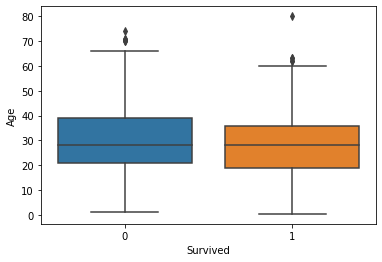

In [20]:
# Se observa gráficamente que la distribución de edades es similar entre los que sobreviven y los que no
# No se da preferencia a los niños
sns.boxplot(x="Survived", y="Age",data= train)

(array([ 18.,  16.,  99., 110.,  64.,  45.,  38.,  15.,  13.,   6.]),
 array([ 1. ,  8.3, 15.6, 22.9, 30.2, 37.5, 44.8, 52.1, 59.4, 66.7, 74. ]),
 <BarContainer object of 10 artists>)

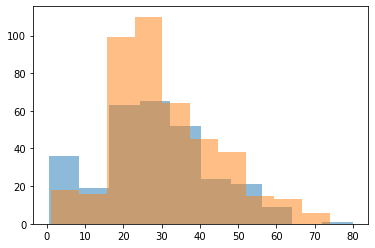

In [21]:
plt.hist(survived['Age'],alpha=0.5)
plt.hist(not_survived['Age'],alpha=0.5)

Skew for train data: 0.38910778230082704


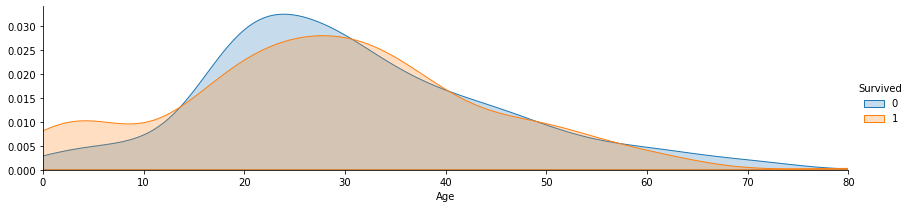

In [22]:
a = sns.FacetGrid(train, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , train['Age'].max()))
a.add_legend()

print('Skew for train data:',train.Age.skew())

In [23]:
# El mayor número de personas que ha sobrevivido ha partido del puerto de S(outhampton)
survived['Embarked'].value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [24]:
# las personas con mayor probabilidades de supervivencia han salido del puerto C
PortS = train.loc[train.Embarked == 'S']["Survived"]
PortC = train.loc[train.Embarked == 'C']["Survived"]
PortQ = train.loc[train.Embarked == 'Q']["Survived"]
rate_PortS = sum(PortS)/len(PortS)
rate_PortC = sum(PortC)/len(PortC)
rate_PortQ = sum(PortQ)/len(PortQ)

print("% of people departure from Port S(outhampton) who survived:", rate_PortS*100)
print("% of people departure from Port C(herbourg) who survived:", rate_PortC*100)
print("% of people departure from Port Q(ueenstown) who survived:", rate_PortQ*100)

% of people departure from Port S(outhampton) who survived: 33.69565217391305
% of people departure from Port C(herbourg) who survived: 55.35714285714286
% of people departure from Port Q(ueenstown) who survived: 38.961038961038966


In [25]:
not_survived['Embarked'].value_counts()

S    427
C     75
Q     47
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

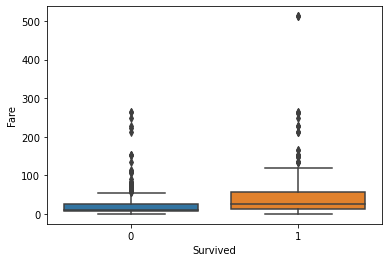

In [26]:
# Se observa la relación entre supervivientes y los pasajeros que han pagado los mayores precios
sns.boxplot(x="Survived", y="Fare",data= train)

### Histograma
Univariate Analysis: Histogram and Bar Chart help to visualize the `distribution and variance of each variable`

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

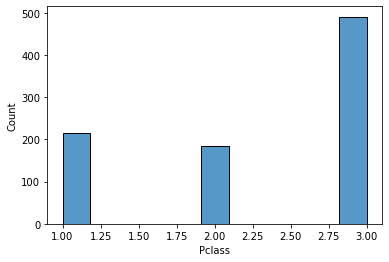

In [27]:
# Se observa la cantidad de pasajeros de cada clase
sns.histplot(train['Pclass'], kde=False)

### Cat Plot
Provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations

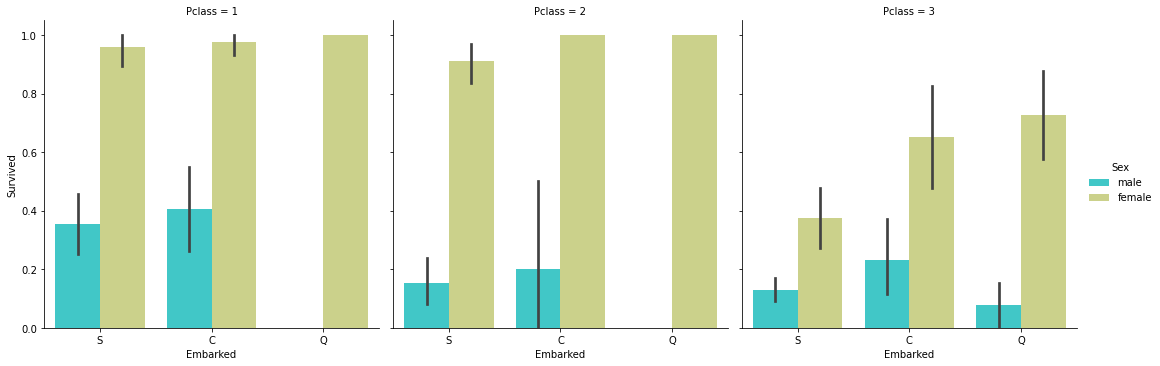

In [28]:
# Se observa la mayor probabilidad de supervivencia de las mujeres en todos las clases y puertos de partida 
sns.catplot(x="Embarked", y="Survived", hue="Sex",col="Pclass", kind = 'bar',data=train, palette = "rainbow")

### Cat plot with violin kind

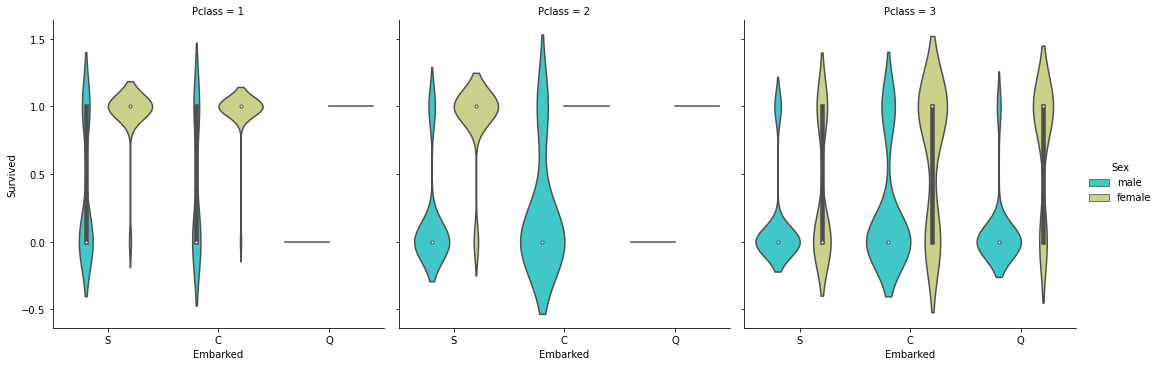

In [29]:
# Se observa la misma información anterior, pero se observa la densidad
sns.catplot(x="Embarked", y="Survived", hue="Sex",col="Pclass", kind = 'violin',data=train, palette = "rainbow")

In [30]:
class1 = train[train.Pclass == 1]
class1['Embarked'].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [31]:
class2 = train[train.Pclass == 2]
class2['Embarked'].value_counts()

S    164
C     17
Q      3
Name: Embarked, dtype: int64

In [32]:
class3 = train[train.Pclass == 3]
class3['Embarked'].value_counts()

S    353
Q     72
C     66
Name: Embarked, dtype: int64

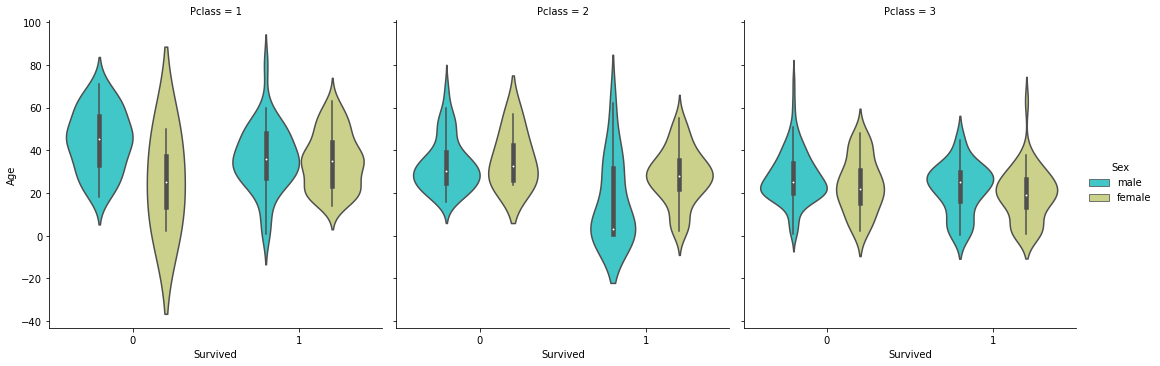

In [33]:
sns.catplot(x="Survived", y="Age", hue="Sex",col="Pclass", kind = 'violin',data=train, palette = "rainbow")

### Violin Plot
Plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

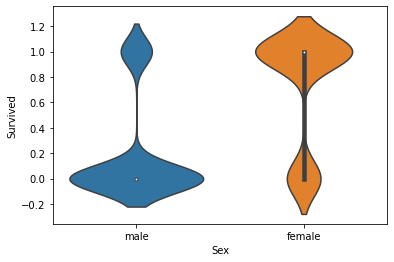

In [34]:
# Se muestra el volumen de personas que sobreviven (o no) de cada sexo
sns.violinplot(x='Sex', y='Survived',data=train)

### Heat Map
Is a representation of data in the form of a map or diagram in which data values are represented as colours

<AxesSubplot:>

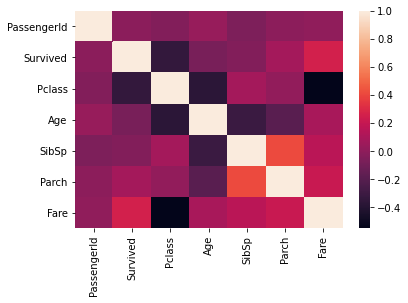

In [35]:
sns.heatmap(train.corr(), fmt = ".2f")

(array([445.,  53.,   0.,  40.,   0.,   2.,   4.,   0.,   4.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

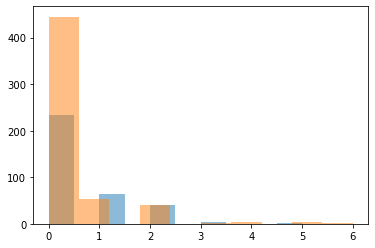

In [36]:
plt.hist(survived['Parch'],alpha=0.5)
plt.hist(not_survived['Parch'],alpha=0.5)

In [37]:
parch0 = train.loc[train.Parch == 0]["Survived"]
rate_parch0 = sum(parch0)/len(parch0)
parch1 = train.loc[train.Parch > 0]["Survived"]
rate_parch1 = sum(parch1)/len(parch1)

print("% of passengers with 0 parent/children who survived:", rate_parch0*100)
print("% of passengers with at least 1 parent/children who survived:", rate_parch1*100)

% of passengers with 0 parent/children who survived: 34.365781710914455
% of passengers with at least 1 parent/children who survived: 51.173708920187785


In [38]:
SibSp0 = train.loc[train.SibSp == 0]["Survived"]
rate_SibSp0 = sum(SibSp0)/len(SibSp0)
SibSp1 = train.loc[train.SibSp > 0]["Survived"]
rate_SibSp1 = sum(SibSp1)/len(SibSp1)

print("% of passengers with 0 siblings/spouses who survived:", rate_SibSp0*100)
print("% of passengers with at least 1 sibling/spouses who survived:", rate_SibSp1*100)

% of passengers with 0 siblings/spouses who survived: 34.53947368421053
% of passengers with at least 1 sibling/spouses who survived: 46.64310954063604


In [39]:
embarkedC = train.loc[train.Embarked == 'C']["Survived"]
rate_embarkedC = sum(embarkedC)/len(embarkedC)
embarkedS = train.loc[train.Embarked == 'S']["Survived"]
rate_embarkedS = sum(embarkedS)/len(embarkedS)
embarkedQ = train.loc[train.Embarked == 'Q']["Survived"]
rate_embarkedQ = sum(embarkedQ)/len(embarkedQ)

print("% of passengers from port C who survived:", rate_embarkedC * 100)
print("% of passengers from port S  who survived:", rate_embarkedS * 100)
print("% of passengers from port Q  who survived:", rate_embarkedQ * 100)

% of passengers from port C who survived: 55.35714285714286
% of passengers from port S  who survived: 33.69565217391305
% of passengers from port Q  who survived: 38.961038961038966


In [40]:
cabin = train.loc[train.Embarked.notnull()]["Survived"]
rate_cabin = sum(cabin)/len(cabin)
noCabin = train.loc[train.Cabin.isnull()]["Survived"]
rate_noCabin = sum(noCabin)/len(noCabin)

print("% of passengers with Cabin who survived:", rate_cabin * 100)
print("% of passengers without Cabin who survived:", rate_noCabin * 100)

% of passengers with Cabin who survived: 38.24521934758155
% of passengers without Cabin who survived: 29.985443959243085


(array([421.,  83.,  25.,   6.,   4.,   4.,   0.,   0.,   3.,   3.]),
 array([  0. ,  26.3,  52.6,  78.9, 105.2, 131.5, 157.8, 184.1, 210.4,
        236.7, 263. ]),
 <BarContainer object of 10 artists>)

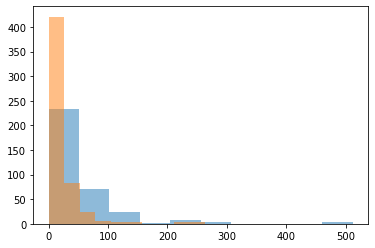

In [41]:
plt.hist(survived['Fare'],alpha=0.5)
plt.hist(not_survived['Fare'],alpha=0.5)